**Importing the necessary libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
data=pd.read_csv("heart_disease.csv")

In [3]:
data.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [4]:
data.shape

(303, 15)

In [5]:
data.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [6]:
# we have two object dtypes

In [7]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

In [8]:
data["ca"]=data.ca.str.replace("?","")

In [9]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302       
Name: ca, Length: 303, dtype: object

In [10]:
data["ca"]=pd.to_numeric(data["ca"],errors="coerce")

In [11]:
data.ca

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

In [12]:
data["thal"]=data.thal.str.replace("?","")

In [13]:
data["thal"]=pd.to_numeric(data.thal,errors="coerce")


In [14]:
data.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object

**Checking for null values**

In [15]:
data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
present       0
dtype: int64

In [16]:
data.ca.value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64>

In [17]:
imputer=KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(data)
data_imputed=pd.DataFrame(data_imputed,columns=data.columns)
data=data_imputed
data.isna().sum()
                          

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

In [18]:
data.dtypes

Unnamed: 0    float64
age           float64
sex           float64
cp            float64
trestbps      float64
chol          float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca            float64
thal          float64
present       float64
dtype: object

In [19]:
data=data.astype(int)

In [20]:
data.dtypes

Unnamed: 0    int32
age           int32
sex           int32
cp            int32
trestbps      int32
chol          int32
fbs           int32
restecg       int32
thalach       int32
exang         int32
oldpeak       int32
slope         int32
ca            int32
thal          int32
present       int32
dtype: object

In [21]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,0.765677,1.600660,0.663366,4.735974,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.070933,0.616226,0.934375,1.933392,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,3.000000,7.000000,1.000000


In [22]:
data=data.drop(columns=["Unnamed: 0"], axis=1)

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,0.765677,1.600660,0.663366,4.735974,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.070933,0.616226,0.934375,1.933392,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,3.000000,7.000000,1.000000


In [24]:
data.dtypes

age         int32
sex         int32
cp          int32
trestbps    int32
chol        int32
fbs         int32
restecg     int32
thalach     int32
exang       int32
oldpeak     int32
slope       int32
ca          int32
thal        int32
present     int32
dtype: object

**Distribution of Age**

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


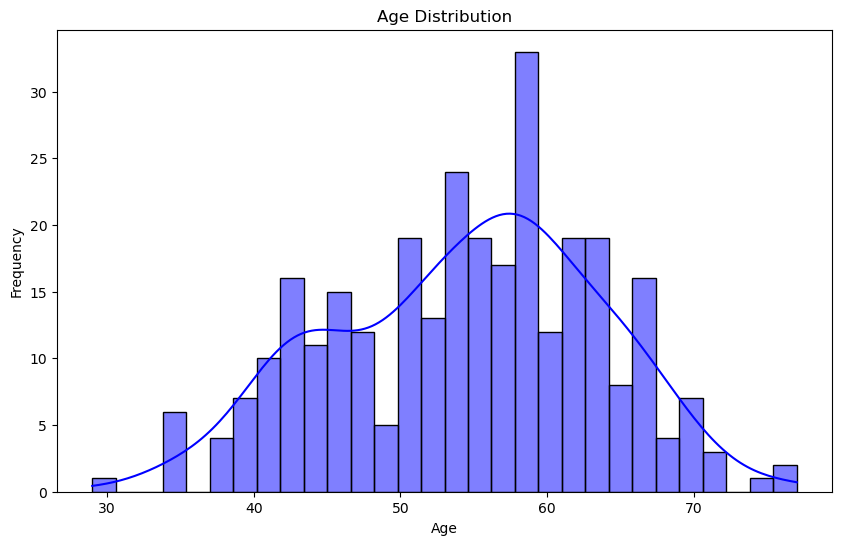

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

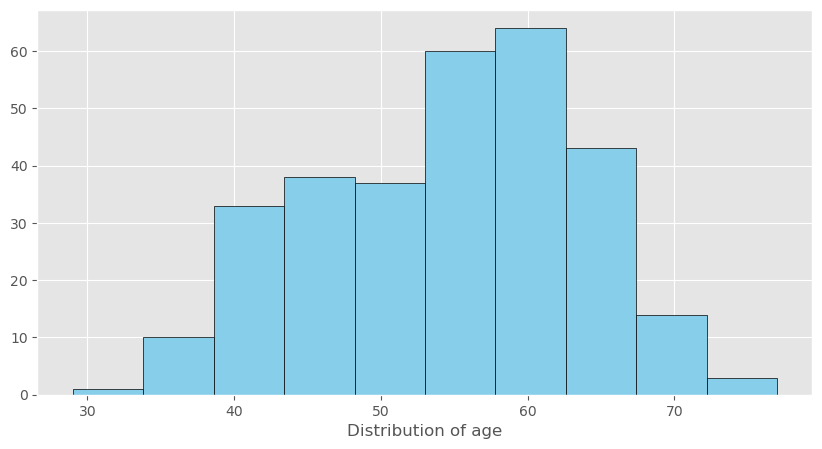

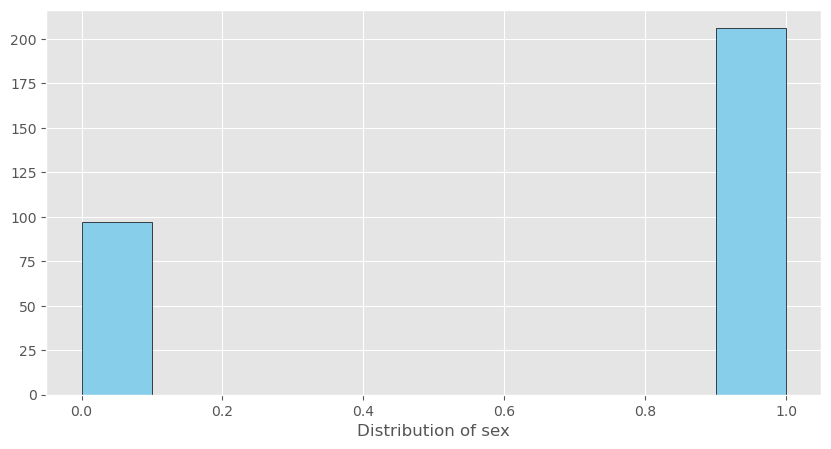

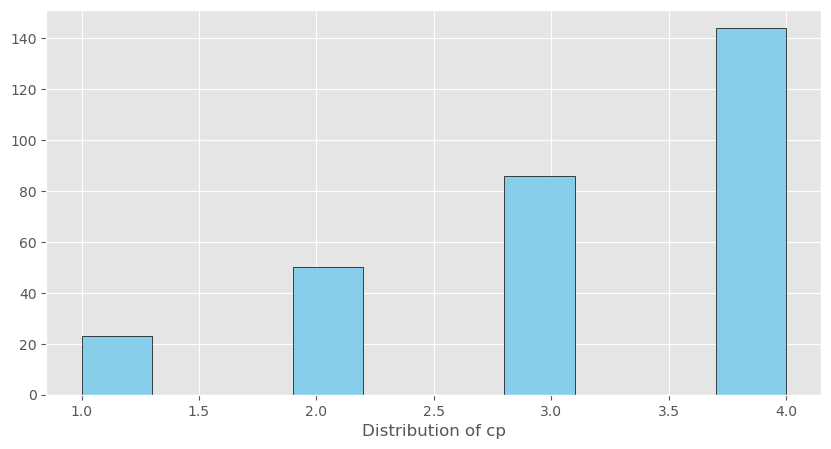

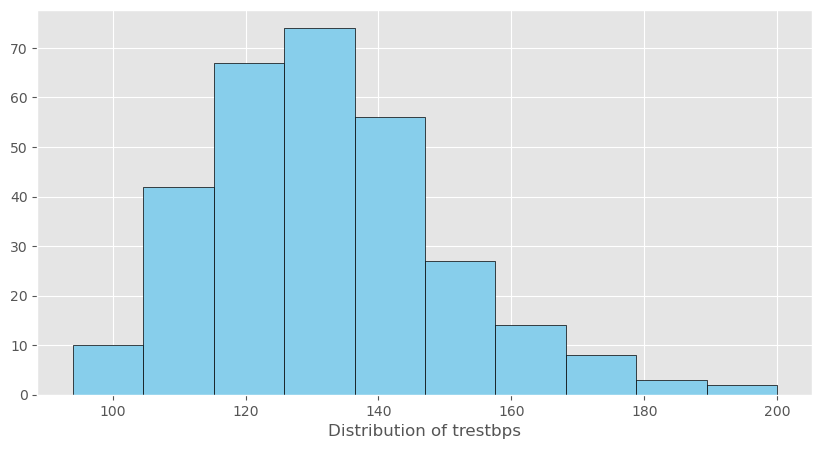

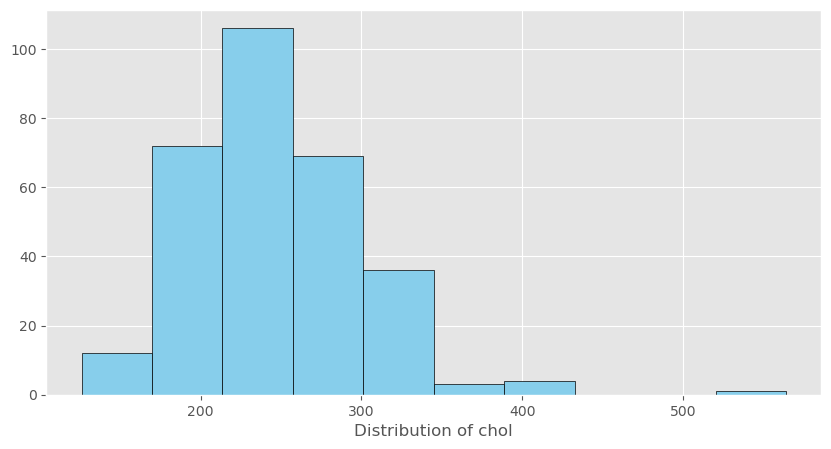

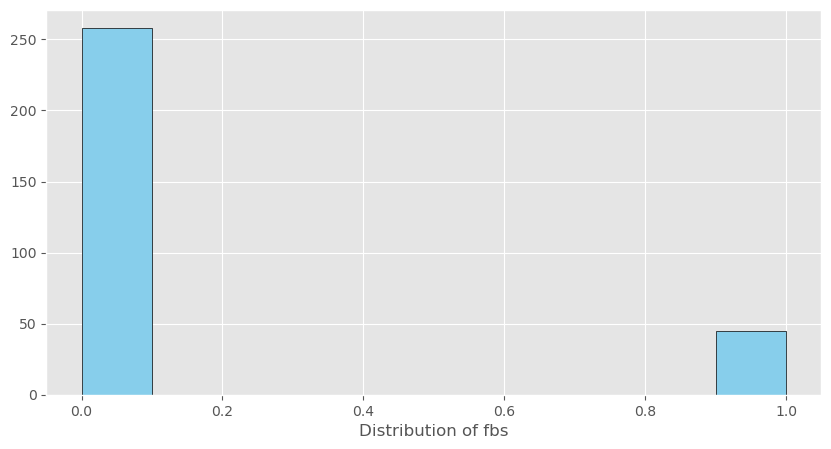

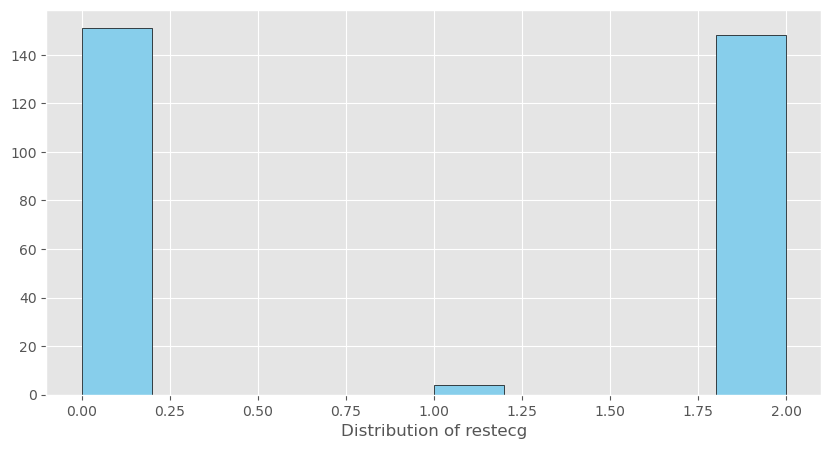

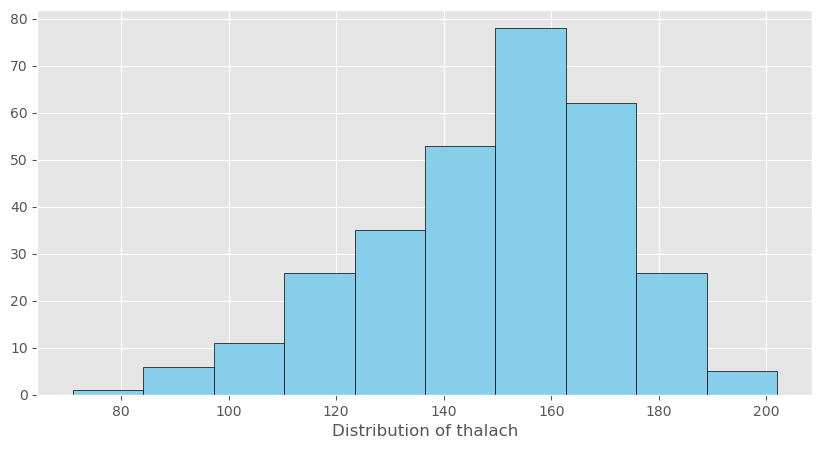

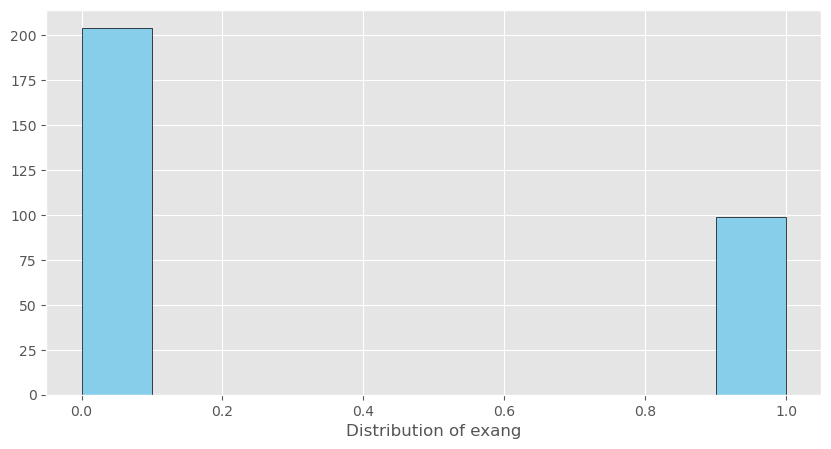

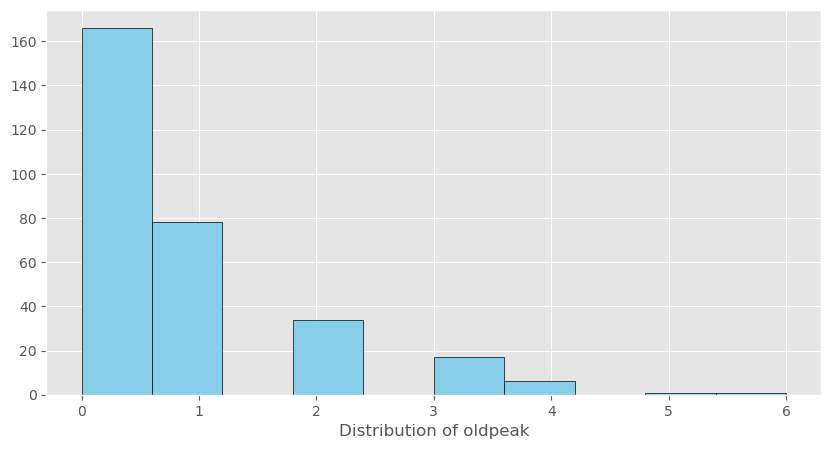

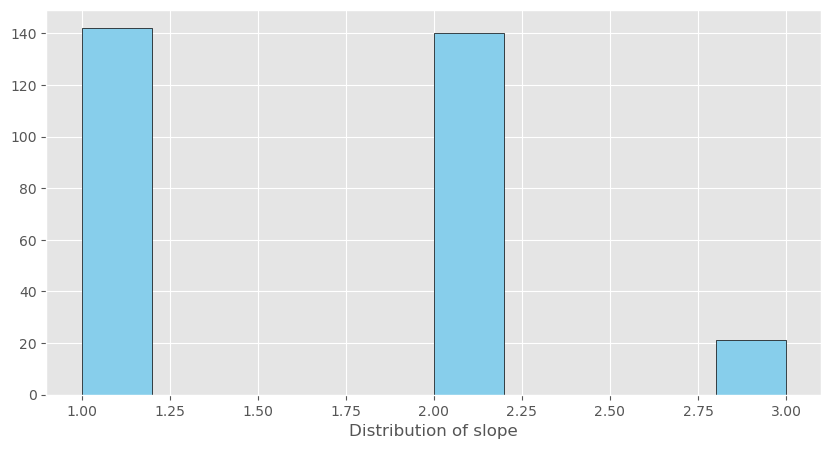

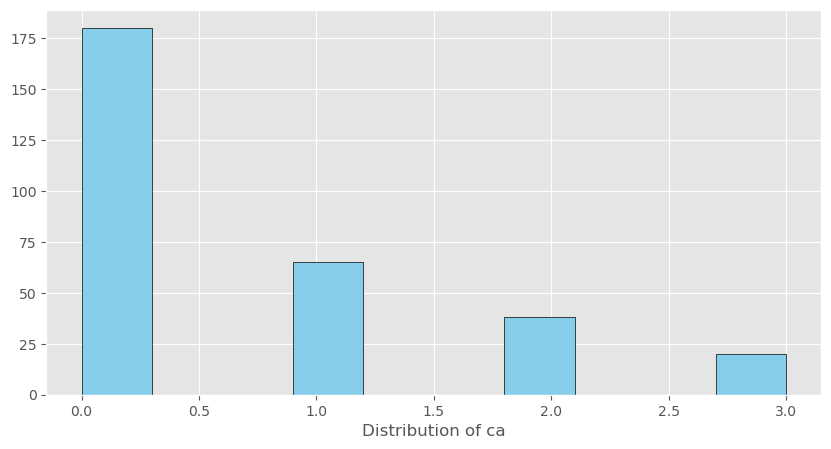

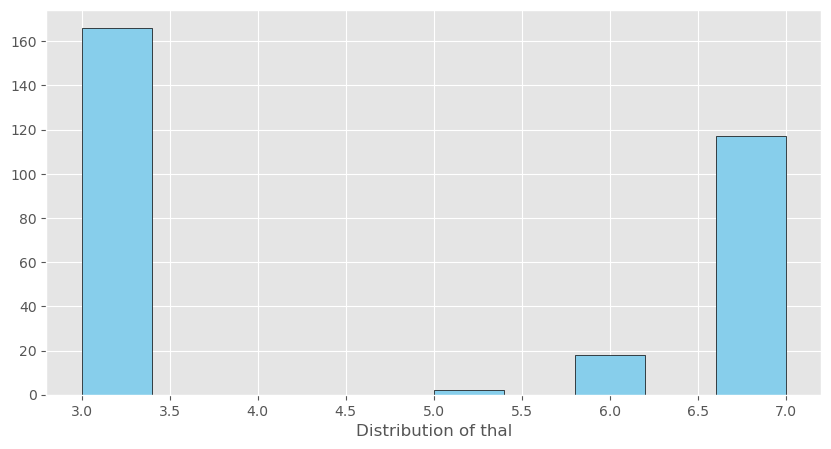

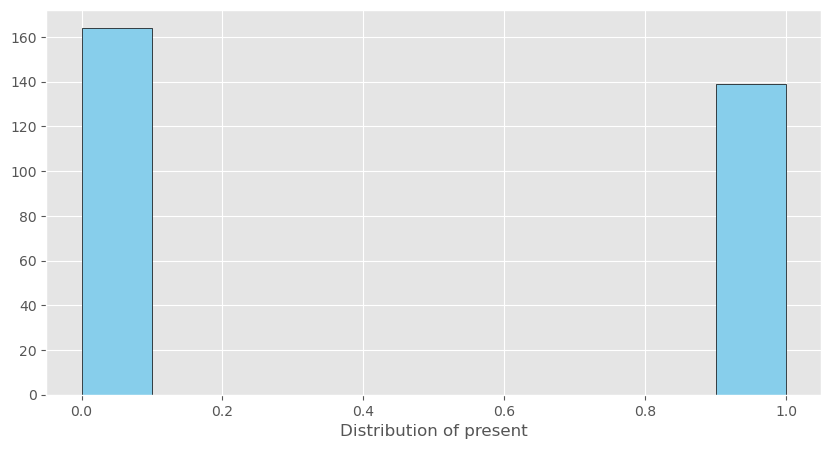

In [26]:
for columns in data:
    plt.style.use("ggplot")
    plt.figure(figsize=(10,5))
    plt.hist(x=columns,data=data,color="skyblue",edgecolor="black")
    plt.xlabel(f"Distribution of {columns}")
plt.show()

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0


In [28]:
data.age.value_counts

<bound method IndexOpsMixin.value_counts of 0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int32>

In [29]:
data.max()

age          77
sex           1
cp            4
trestbps    200
chol        564
fbs           1
restecg       2
thalach     202
exang         1
oldpeak       6
slope         3
ca            3
thal          7
present       1
dtype: int32

In [30]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.173491,0.161770,0.365323,0.127165,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.094423,0.037533,0.086048,0.378926,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.219781,0.152050,0.233117,0.265203,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.186920,0.117382,0.097528,0.133335,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.029572,-0.004062,0.123726,0.013544,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.022088,0.059894,0.140764,0.071552,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.119011,0.133946,0.131749,0.024456,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.326817,-0.385601,-0.265699,-0.279074,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.271144,0.257748,0.145788,0.328606,0.431894
oldpeak,0.173491,0.094423,0.219781,0.186920,0.029572,0.022088,0.119011,-0.326817,0.271144,1.000000,0.555175,0.304764,0.323451,0.418588


In [31]:
correlation=data.corr()

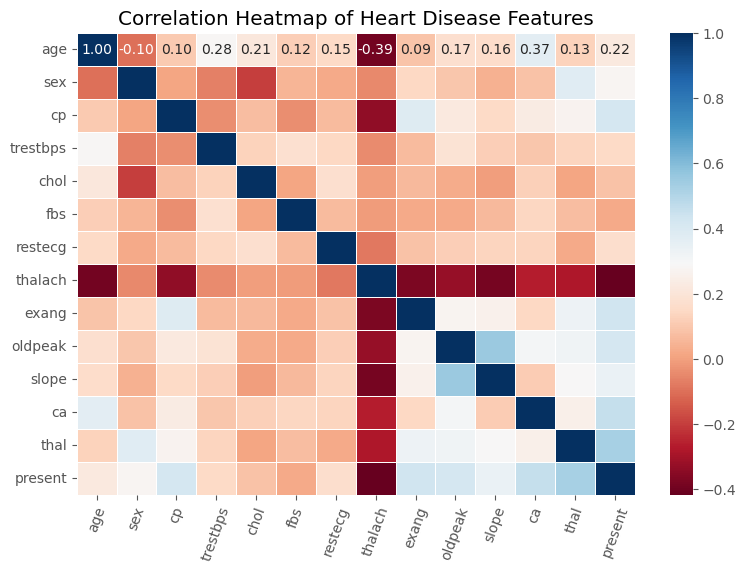

In [32]:
plt.figure(figsize=(9,6))
sns.heatmap(correlation,annot=True,fmt=".02f",cmap="RdBu",linewidths=0.5)
plt.xticks(rotation=70)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()

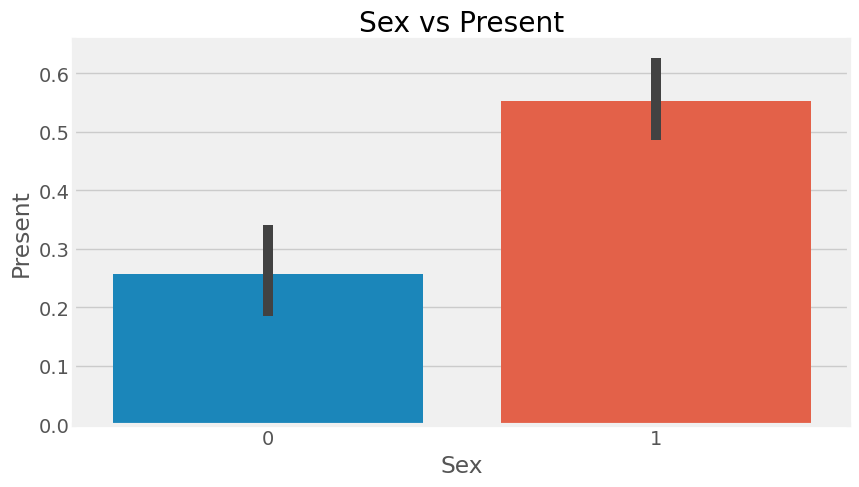

In [33]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='sex', y='present', data=data)
plt.xlabel('Sex')
plt.ylabel('Present')
plt.title('Sex vs Present')
plt.show()

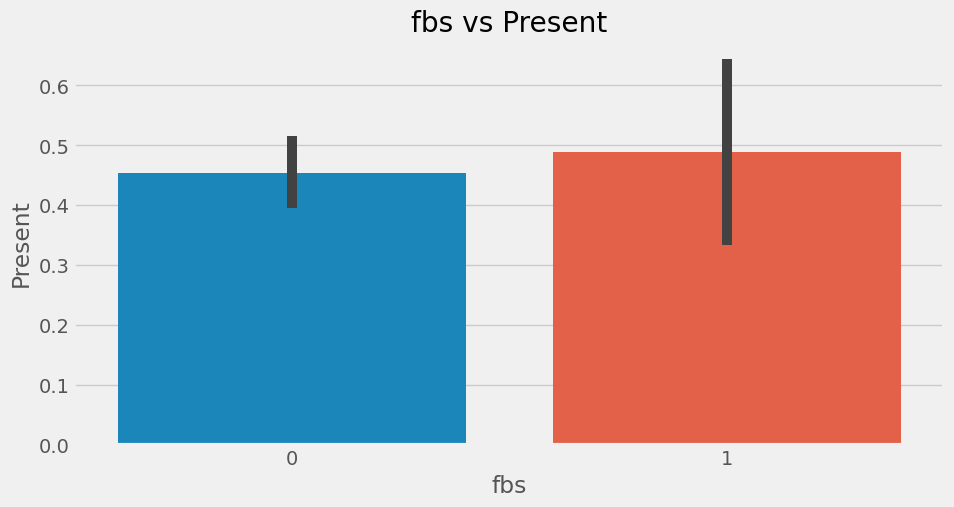

In [34]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='fbs', y='present', data=data)
plt.xlabel('fbs')
plt.ylabel('Present')
plt.title('fbs vs Present')
plt.show()

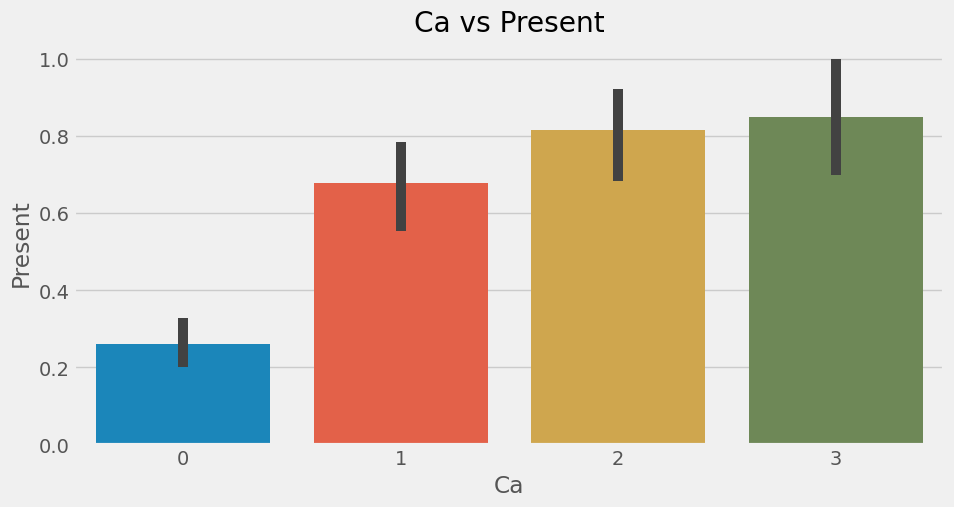

In [35]:
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")

sns.barplot(x='ca', y='present', data=data)
plt.xlabel('Ca')
plt.ylabel('Present')
plt.title('Ca vs Present')
plt.show()

<Axes: xlabel='sex', ylabel='present'>

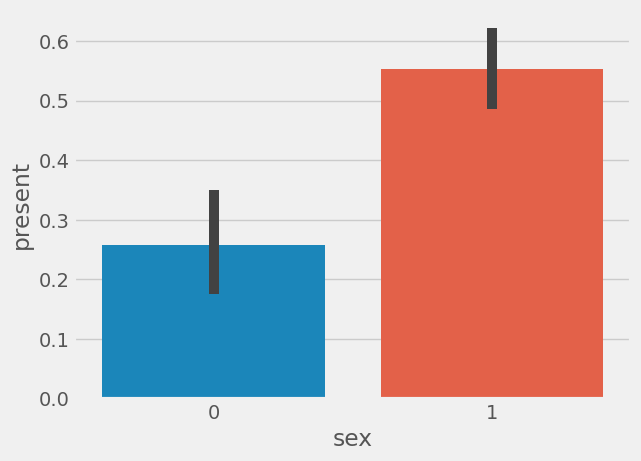

In [36]:
sns.barplot(x="sex",y="present",data=data)

In [37]:
data.present.value_counts()

present
0    164
1    139
Name: count, dtype: int64

In [38]:
###Regression Modelling
#from scikit_learn import 

In [39]:
x_train=data.drop(['present'],axis=1)
y_train=data.present

In [40]:
y_train

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: present, Length: 303, dtype: int32

In [41]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2,3,0,6
1,67,1,4,160,286,0,2,108,1,1,2,3,3
2,67,1,4,120,229,0,2,129,1,2,2,2,7
3,37,1,3,130,250,0,0,187,0,3,3,0,3
4,41,0,2,130,204,0,2,172,0,1,1,0,3


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=100)

In [43]:
x_test.shape

(31, 13)

In [44]:
y_test.shape

(31,)

In [45]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
preds=model.predict(x_test)

accuracy_score(y_test,preds)

0.967741935483871

In [47]:
classification_report(y_test,preds,output_dict=True)

{'0': {'precision': 0.9444444444444444,
  'recall': 1.0,
  'f1-score': 0.9714285714285714,
  'support': 17.0},
 '1': {'precision': 1.0,
  'recall': 0.9285714285714286,
  'f1-score': 0.9629629629629629,
  'support': 14.0},
 'accuracy': 0.967741935483871,
 'macro avg': {'precision': 0.9722222222222222,
  'recall': 0.9642857142857143,
  'f1-score': 0.9671957671957672,
  'support': 31.0},
 'weighted avg': {'precision': 0.9695340501792115,
  'recall': 0.967741935483871,
  'f1-score': 0.9676053934118449,
  'support': 31.0}}

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f"{name}: {model.score(x_test, y_test)}")


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.967741935483871
K-Nearest Neighbors: 0.6129032258064516
Support Vector Machines: 0.6774193548387096
Decision Trees: 0.7741935483870968
Random Forests: 0.967741935483871


In [49]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")


Best model: RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=10)
Best score: 0.8307070707070707
CPU times: total: 2.5 s
Wall time: 1min 50s


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [50]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(x_train, y_train)

# Get the selected features and their ranks
selected_features = x_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")



Selected features: Index(['cp', 'thalach', 'ca', 'thal'], dtype='object')
Feature ranks: [ 2  8  1  5  4 10  9  1  3  6  7  1  1]
CPU times: total: 33.6 s
Wall time: 1min


In [51]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Exited' in selected_features_list:
    selected_features_list.remove('Exited')

# Create new dataframes with only the selected features
X_train_selected = x_train[selected_features_list]
X_test_selected = x_test[selected_features_list]

Text(0.5, 1.0, 'Confusion Matrix')

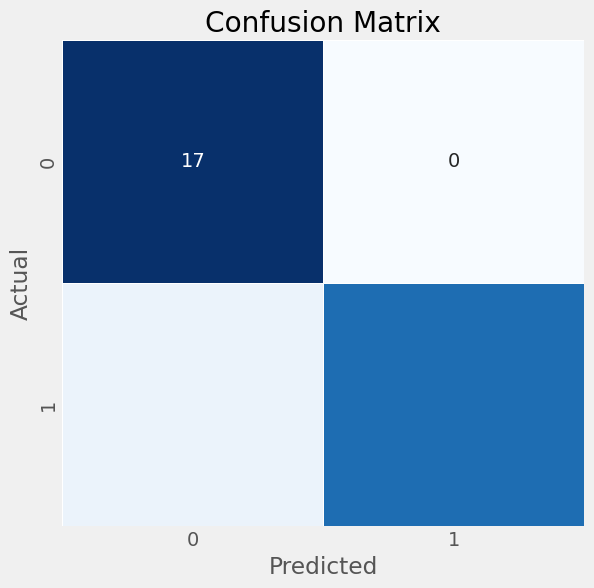

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


In [53]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [55]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(x_train, y_train) 

RandomForestClassifier()

In [56]:
import joblib

# Save the best model to a file

joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']